### Import a definice funkcí pro tento notes
(Následující buňku jen proveďte Shift+Enter a nemusíte si s ní lámat hlavu)

In [28]:
from IPython.display import display,Math
from string import replace
from matplotlib.pyplot import *
%matplotlib inline   
from numpy import *
#import numpy as np
from math import factorial as fact   
from __future__ import division
from sympy import simplify,latex,oo  # oo, -oo ... nekonecno, napr. pro integraci ()
#--------------------------------------------
#vytvoreni vlastnich funkci 

def nad(a,b):   # a nad b
    c=fact(a)/(fact(b)*fact(a-b))
    return(c)

def disp(b,vzorec):   
    """" vlastni funkce pro renderovani Sympy vzorcu do LaTeXu,
    (mozna jste si vytvorili nebo nasli lepsi funkci)
    priklad pouziti:  disp("f=",vzorec) nebo disp("f= "+dfrac(vzorec)+" =",vzorec)
    """  
    vzorec=simplify(vzorec)
    vzorec=latex(vzorec)
    vzorec=vzorec.replace("\\frac{","\\dfrac{")
    vzorec=b+vzorec
    display(Math(vzorec))  
    
def dfrac(vzorec):   
    """upravi v SymPy vzorci \frac na \dfrac a vrati string vzorce pro renderovani v LaTeXu, 
    vyuziti napr. pro vzorce v nadpisech grafu , muze byt nutne pridat "$"+dfrac(vzorec)+"$" 
    napr.(jinak se pri deleni zmensuje v LaTeXu font, coz nevypada vzdy pekne)
    (pro exp. funkce to porad bohuzel nemusi udrzet velikost fontu) """
    vzorec=latex(vzorec)
    vzorec=vzorec.replace("\\frac{","\\dfrac{")
    return(vzorec)
#--------------------------------------------
# dalši vlastni nastaveni   
rcParams.update({'font.size': 16})  #font textu v grafech    


<div style="width:100%;height:10px;background-color:green;"> </div>

<h2>Statistická Mechanika </h2>
<h3>Notes 5 - Regresní výpočty </h3>
 - <b>příklad lineární regrese $y=\phi(x)=a_0+a_1\cdot x$</b>
 - <b>typy regresních funkcí</b>
 - <b>míra lineární závislosti:</b>
     -  pro dvě veličiny, tj. $y=\phi(x)$, korelační koeficient, koeficient determinace
     -  pro více veličin, tj. $y=\phi(\textbf{x})=\phi(\left[ x_1,x_2,... \right])$ adjustovaný koeficient determinace 
 - <b>míra nelineární závislosti:</b>
     - vzájemná informace (Mutual Information, pro dvě i více veličin, tj. $y=\phi([x_1,x_2,...])$
 - <b>výpočet regresních koeficientů (parametrů modelu)</b>    
     - algoritmus Levenberg-Marquardt (L-M) pro lineární i nelineární regresi
     - konjugované gradienty pro (v parametrech) lineární regresi
     - krokové metody (RLS - metoda rekursivních nejmenších čtverců)
 
<div style="width:100%;height:10px;background-color:green;"> </div>

### Motivace

Mějme $N$ naměřených hodnot dvou veličin $x$ a $y$, kdy předpokládáme, že $y$ obecně závisí na $x$, tj.$$y=\phi(x)$$
Reálně však data mohou obsahovat chyby měření, šum, výpadky senzorů, apod...

V obecné závislosti $y$ na $x$ tak musíme předpokládat náhodnou složku (šum) $\epsilon$ , tj. $$y=\phi(x)+\epsilon$$
<hr>

1) Předpokládejme možnou lineární závislost $$y_i=\phi(x_i)=a_0+a_1 \cdot x_i ,$$
kde $i$ je index vzorku dat a $a_0$ a $a_1$ jsou hledané parametry regresní závislosti. 
  - <b>Jak silná je lineární závislost v datech? </b>
  - <b>Jak určíme parametry $a_0, a_1$?</b>
   - <b>metoda nejmenších čtverců</b>
   - <b>iterační metoda L-M (při špatně podmíněných datech)ů</b>
    - (krokové) iterační metody (updatují regresní model pro každý jeden naměřený krok individuelně - online metody)
     - stochastický gradient descent (NLMS nebo normalizovaný gradient descent)
     - rekurzivní nejmenší čtverce (RLS)
    
<hr>

2) <b>Předpokládejme možnou v parametrech nelineární závislost $$y_i=\phi(x_i),$$ kterou nelze transformovat na lineární.</b>
  - Jak silná je nelineární závislost v datech? 
  - Jaký použijeme regresní model?
  - <b>Jak najdeme parametry regresního modelu
   - (dávková) iterační metoda Levenberg-Marquardt (L-M) (updatují regresní model pro všechna naměřená data najednou)</b>

<div style="width:100%;height:5px;background-color:green;"> </div>


Pearsonův korelační koeficient - míra lineární závislosti dvou veličin
$$r(x_r,y_r)=\dfrac{1}{N}\sum\limits_{i=0}^{N-1}\dfrac{(x_r[i]-\bar{x}_r)\cdot(y_r[i]-\bar{y}_r)}{ \sigma_x \cdot \sigma_y}$$

kde $x_r$ a $y_r$ jsou měřené hodnoty veličin $x$ a $y$.

<small>a pokud jde indexování prvků od nuly.</small>

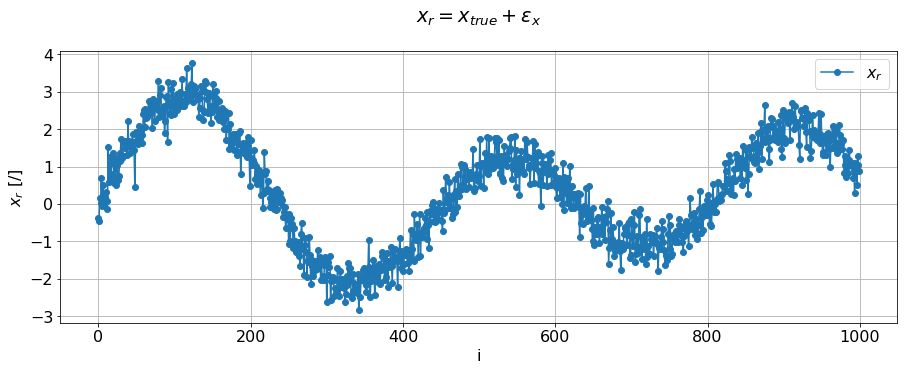

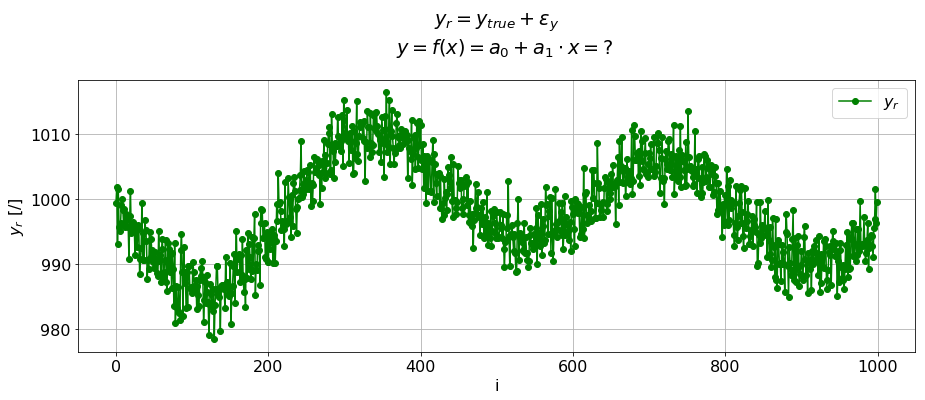

In [29]:
#--"namereni" x a y-----------------------
N=1000    # delka mereni
#-----------------------------------------

x_true=sin(arange(N)/(N/10))+2*sin(arange(N)/(N/15))  #namerena nezavisla  x#
y_true=-5*x_true + 1000           # idealni zavisla y bez sumu   

epsilon_x=random.randn(N)/3
epsilon_y=random.randn(N)*3    # sum, chyby v mereni, atd..."

xr=x_true+epsilon_x
yr=y_true+epsilon_y

figure(figsize=(15,5))
plot(xr,'-o',label="$x_r$");xlabel('i');ylabel('$x_r \ [/]$');grid()
title("$x_r=x_{true}+\epsilon_x$ \n")
legend();show()

figure(figsize=(15,5))
plot(yr,'-og',label="$y_r$");xlabel('i');ylabel('$y_r \ [/]$');grid()
title("$y_r=y_{true}+\epsilon_y$ \n   $y=f(x)=a_0+a_1\cdot x=?$ \n")
legend();show()

In [30]:
meanx=mean(xr);meany=mean(yr)
stdx=std(xr);stdy=std(yr)
r=mean((xr-meanx)*(yr-meany))/stdx/stdy
disp("r=",r)

print "numpy.corrcoef(xr,yr)="
print corrcoef(xr,yr)   # jako funkce v Numpy


r2=r**2
disp("koeficient \ determinace \ r^2=",r**2)



<IPython.core.display.Math object>

numpy.corrcoef(xr,yr)=
[[ 1.         -0.89755503]
 [-0.89755503  1.        ]]


<IPython.core.display.Math object>

<div style="width:100%;height:5px;background-color:green;"> </div>
#### Mějme v datech nelineární závislost - korelační koeficient pak nelze použít přímo:

<IPython.core.display.Math object>

pro nelineární závislost nám korelační koeficient nic neříká!!!


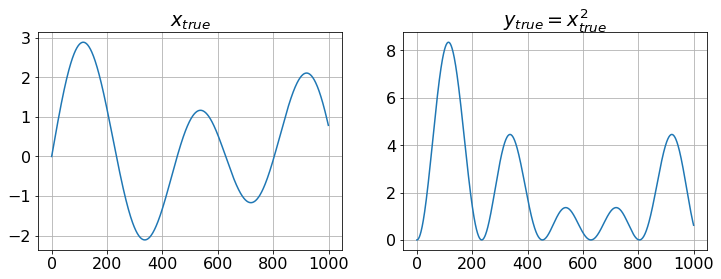

In [31]:
y_true=x_true**2
figure(figsize=(12,4))
subplot(121);plot(x_true);grid();title("$x_{true}$")
subplot(122);plot(y_true);grid();title("$y_{true}=x_{true}^2$")
#--
meanx=mean(x_true);meany=mean(y_true)
stdx=std(x_true);stdy=std(y_true)
r=mean((x_true-meanx)*(y_true-meany))/stdx/stdy
disp("r(x_{true},x_{true}^2)=",r)
print ("pro nelineární závislost nám korelační koeficient nic neříká!!!")

<div style="width:100%;height:10px;background-color:green;"> </div>


## Příklad 5.1    - Lineární regrese






viz. hodina - <a href="cviceni regrese .ipynb">cvičení regrese</a>

viz. iterativní metoda <a href="regrese - Konjugovane Gradienty.ipynb">konjugovaných gradientů</a>

<div style="width:100%;height:10px;background-color:green;"> </div>

## Příklad 5.2   - Nelineární regrese (nelinární v parametrech)

(Demonstrační příklad)

Robotická paže v rovině sestává ze dvou kloubů a dvou ramen o délkách $l_0$ a $l_1$ (viz Obr.1). 

<center>
<img src="http://users.fs.cvut.cz/ivo.bukovsky/STATMECH/notes/robot_paze.png" width=400px>
<br>
  Obr.1:Robotická paže v rovině
</center>

Poloha koncového bodu v souřadnicovém systému $[x,y]$ je teoreticky dána vztahy

<div style="width:100%;height:60px;padding-top:15px">
<div style="float:left;width:80%">
$$x=l_0\cdot cos(\alpha) +l_1 \cdot cos(\alpha+\beta)  \ ,  $$ </div>
 <div style="float:left;width:20%"> (1) </div>

<div style="float:left;width:80%">
$$y=l_0\cdot sin(\alpha) +l_1 \cdot sin(\alpha+\beta) \ .   $$ </div>
 <div style="float:left;width:20%"> (2) </div>
 </div>


Představme si situaci, kdy pro určení polohy koncového bodu lze použít jen senzory uhlů $\alpha, \beta$ a souřadnice $[x,y]$ je možné ověřit jen na testovací platformě (v provozu měříme jen úhly a to ještě nepřesně).

Takže pokud jsou měření úhlů zatížena chybou, nemusí  vztahy (1) a (2) pro určení polohy vyhovovat a je třeba hodnoty úhlů ze senzorů v (1) a (2) korigovat. 

Pokud lze předpokládat, že nepřesné údaje ze senzorů lze po vhodné korekci v rovnicích polohy (1) a (2) stále využít, můžeme navrhnout nelineární regresní funkce na základě (1) a (2), které budou počítat polohu $[x,y]$ přesněji. V našem případě by to mohly být regresní funkce


<div style="width:100%;height:60px;padding-top:15px">
<div style="float:left;width:80%">
$$x[i]=l_0\cdot cos(\alpha_r[i]-a_0) +l_1 \cdot cos(\alpha_r[i]+\beta_r[i] - a_1)  \ ,  $$ </div>
 <div style="float:left;width:20%"> (3) </div>

<div style="float:left;width:80%">
$$y[i]=l_0\cdot sin(\alpha_r[i]-a_0) +l_1 \cdot sin(\alpha_r[i]+\beta_r[i] - a_1) \ ,   $$ </div>
 <div style="float:left;width:20%"> (4) </div>
 </div>

kde 

$\textbf{a}=[a_0,a_1]$ ... je vektor hledaných regresních parametrů,
 
$\alpha_r[i],\beta_r[i]$  ... jsou naměřené hodnoty úhlů ze senzorů (nezávislé proměnné),

$x[i],y[i]$  ...  jsou spočítané hodnoty regresních funkcí (modelů) (závislé proměnné)
 
$x_r[i],y_r[i]$  ... budou <b>r</b>eálné polohy zjištěné na testovací platformě (závislé proměnné),

$i$  ... je index měření ($i=1,2,...,N$), zde to může být i diskrétní index času
 
$N$ ...  je počet měření, tj, $\textbf{x}_r$ je vektor o délce $N$ prvků a podobně tak vektory $\textbf{y}_r,\boldsymbol{\alpha}_r,\boldsymbol{\beta}_r$ , a

$l_0,l_1$ jsou známé rozměry.

Parametry regresních funkcí pak můžeme odhadnout na základě měřených dat, tj., pokud na testovací platformě můžeme pro naměřené hodnoty úhlů $\alpha$ a $\beta$ zjistit (odměřit) pozice v souřadném systému $[x,y]$ (v provozu potom nemusí být měření $[x,y]$ vůbec dostupné a nebo opět nepřesné).


Za předpokladu, že lze úhly korigovat pomocí korekčních koeficientů, tak odhadněte korekční parametry $a_0$ a $a_1$ z naměřených dat  $\textbf{x}_r, \textbf{y}_r,\boldsymbol{\alpha}_r,\boldsymbol{\beta}_r$ v regresních vztazích (3) a (4) pokud:

 - je zjištěna jen poloha x pro oba úhly,
 - je zjištěna jen poloha y pro oba úhly,
 - jsou zjištěny obě polohy [x,y] pro oba úhly,
<br><br>


Protože náš regresní model(1) je nelineární v parametrech a nelze jej transformovat ani na lineární alternativu a ani ne lineární v parametrech, tak máme úlohu nelineární regrese.
Můžeme se pokusit nalézt vektor regresních parametrů $\textbf{a}=[a_0,a_1]$ iterativním algoritmem Levenberg-Marquardt (L-M), kde inkrementální přírůstky parametrů regresního vektoru $\Delta \textbf{a}$ počítáme v několika iteracích (tzv. epochách) podle vzorců 
<div style="width:100%;height:120px;padding-top:15px">
<div style="float:left;width:80%;height:80px">
 $$\Delta \textbf{a}^T=\begin{bmatrix}
 \Delta a_0 \\
 \Delta a_1 
 \end{bmatrix}
 =\left( \textbf{J}^T\cdot \textbf{J} +\large{ \frac{1}{\mu}}\cdot\textbf{L}\right)^{-1}\cdot \textbf{J}^{T}\cdot \textbf{e} \ ,$$ </div> 
 <div style="float:left;width:20%;height:80px"> <br> (3) </div>
 <div style="float:left;width:80%">
 $$\textbf{a}=\textbf{a}+\Delta \textbf{a}, $$</div>
 <div style="float:left;width:20%"> (4) </div>
 </div>
 
 kde $^{-1}$ je inverze matice


 a význam proměnných a parametrů v (1) je následující:

$\textbf{J}$ ... Jakobián, tj matice jejíž sloupce jsou parciální derivace regresní funkce podle jednotlivých parametrů a řádky odpovídají indexu měření $i$, v našem případě tedy

<div style="width:100%;height:170px;padding-top:15px">
<div style="float:left;width:80%;height:160px">
$$\textbf{J}=
\begin{bmatrix}
\dfrac{\partial x(i=0)}{\partial a_0} & \dfrac{\partial x(i=0)}{\partial a_1}\\
\dfrac{\partial x(i=1)}{\partial a_0} & \dfrac{\partial x(i=1)}{\partial a_1} \\
\vdots & \vdots \\
\dfrac{\partial x(i=N-1)}{\partial a_0} & \dfrac{\partial x(i=N-1)}{\partial a_1} \\
\end{bmatrix}
$$</div>
 <div style="float:left;width:20%"> <br><br><br>(5) </div>
 </div>
 
 kde
 
$\mu$ ... koeficient rychlosti učení (learning rate),volitelný parametr

$\textbf{L}$ ... jednotková matice (v nejjednodušší formě algoritmu)

$\textbf{e}$ ... vektor chyb regresního modelu, např. pro souřadnici $\textbf{x}$ to je $\textbf{e}_x=\textbf{x}_r-\textbf{x}$

přičemž v první epoše (iteraci) často musíme zvolit počáteční vektor regresních parametrů $\textbf{a}$ náhodně, nebo pokud možno co nejblíže očekávaným hodnotám (pomůžeme tak algoritmu správně konvergovat).

<div style="width:100%;height:3px;background-color:green;"> </div>
Postup iterativního odhadu parametrů $\textbf{a}$ pro regresní funkci (1) algoritmem L-M (3)(4) je následující:
 <ol>
    <li> Volba náhodných počátečních (pokud možno přibližných) hodnot $\textbf{a}$ </li>   
    <li> start trénovacích epoch</li>
        <ol>
        <li>výpočet výstupů regresních funkcí pro všechny trénovací data (měřené úhly) pro aktuální $\textbf{a}$ </li>
    <li> výpočet vektoru chyb regresního modelu $\textbf{e}$</li>
    <li> výpočet Jakobiánu $\textbf{J}$</li>
    <li> výpočet inkrementálního přírůstku $\Delta \textbf{a}$ pravidlem L-M (3)</li>
    <li> update aktuálních parametrů regresního modelu $\textbf{a}=\textbf{a}+\Delta \textbf{a}$</li>
    <li> validace updatu, tj. výpočet regresních modelů a chybového kriteria $Q_{valid}=\sum\limits_{validacni \ data}(e_{valid}^2)$ pro validační data $\textbf{x}_r, \textbf{y}_r,\boldsymbol{\alpha}_r,\boldsymbol{\beta}_r$, tj. které nebyly použity  pro natrénování modelu </li>
    <li> zpět na A (dokud $Q_{valid}$ s udpatováním $\textbf{a}$ klesá)  </li>
    </ol>
   <li> otestování, tj. výpočet regresních modelů a chybového kriteria na testovacích datech $\textbf{x}_r, \textbf{y}_r,\boldsymbol{\alpha}_r,\boldsymbol{\beta}_r$, tj. které nebyly použity ani pro natrénování modelu ani pro validaci</li> 
 </ol>

<div style="width:100%;height:5px;background-color:green;"> </div>
<h3> Řešení jen při známé poloze  $x$ , tj. odměřené kvůli získání regresního modelu </h3>

V následující buňce si "naměříme" data. (Toto je demonst. příklad)

Veličiny, které představují naměřené hodnoty jsou označeny dolním indexem $_r$ ,tj. reálné=měřené, jako např. $\alpha_r$ nebo $x_r$.

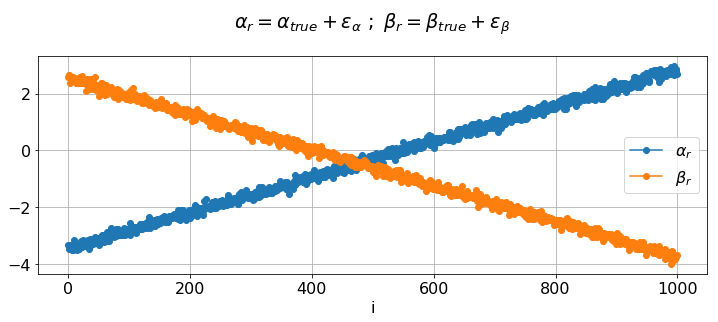

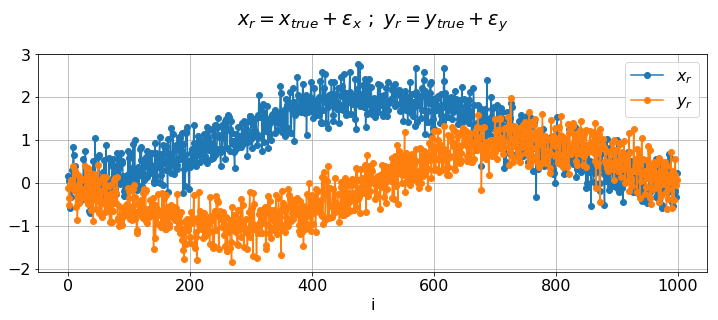

In [32]:
#---Setups----
N=1000
L0=1
L1=1
#---
alpha_true=linspace(-pi,pi,N)   # vektor N hodnot mezi 0 a pi/2
beta_true=linspace(pi,-pi,N)
#--
alphar=alpha_true-.3+random.randn(N)/10
alphar=alphar.round(6)
betar=beta_true-.6+random.randn(N)/10
betar=betar.round(6)
#-------
x_true=L0*cos(alpha_true)+L1*cos(alpha_true+beta_true)
y_true=L0*sin(alpha_true)+L1*sin(alpha_true+beta_true)
#--
xr=x_true+random.randn(N)/3
xr=xr.round(6)
yr=y_true+random.randn(N)/3
yr=yr.round(6)

#-------
figure(figsize=(12,4))
grid()
tit=ur"$\alpha_r=\alpha_{true} + \epsilon_\alpha \ ; \ \beta_r=\beta_{true}+ \epsilon_\beta \ $"
title(tit+"\n")
plot(alphar,'o-',label=ur"$\alpha_r$")
plot(betar,'o-',label=ur"$\beta_r$");xlabel("i")
legend()
figure(figsize=(12,4))
grid()
tit=ur"$x_r=x_{true} + \epsilon_x \ ; \ y_r=y_{true}+ \epsilon_y \ $"
title(tit+"\n")   # \n ... prida dalsi radek (aby nadpis nebyl prilis blizko grafu)
plot(xr,'o-',label="$x_r$")
plot(yr,'o-',label=ur"$y_r$");xlabel("i")
legend()
show()

Máme tedy trénovací vektory dat $\boldsymbol{\alpha}_r,\boldsymbol{\beta}_r,\textbf{x}_r$ pro regresní model (1), 

$$x[i]=\phi(\alpha_r[i],\beta_r[i],a_0,a_1) \  = \ l_0\cdot cos(\alpha_r[i]-a_0) +l_1 \cdot cos(\alpha_r[i]+\beta_r[i] - a_1)$$

 
kde $a_0, a_1$ jsou hledané koeficienty,

$x$ je závislá (výstupní) proměnná a

$i$ je index vzorku měření (může být i diskrétní index času). 

Tabulka trénovacích dat pak vypadá tedy následovně

In [33]:
print "i     alphar       betar          xr   "
print "--------------------------------------"
for i in range(10):
    print i,"  ",alphar[i],"  ",betar[i],"  ",xr[i]
print "...      ...       ...        ...   "

i     alphar       betar          xr   
--------------------------------------
0    -3.339425    2.590007    0.156502
1    -3.373667    2.662948    0.142597
2    -3.476682    2.664226    0.038491
3    -3.331668    2.379952    -0.586259
4    -3.348354    2.42948    -0.157517
5    -3.473555    2.517299    -0.336508
6    -3.371532    2.49101    0.306764
7    -3.502207    2.564608    -0.025863
8    -3.50029    2.598093    0.830277
9    -3.449371    2.555376    0.649396
...      ...       ...        ...   


Máme nměřeno $N$ dat, jednu třetinu dat použijeme jako trénovací data, druhou třetinu použijeme jako validační (po každé epoše, tj po každém updatu $\textbf{a}$) a poslední třetinu pro testování po ukončení všech epoch trénování.

Třetiny dat vyberem jako každý třetí vzorek, raději než data za sebou. Tj. 

$x_{train}=xr[::3], \alpha_{train}=\alpha_r[::3], \beta_{train}=\beta_r[::3] $  <small> tj, od prvního (v Pythonu od začátku každý třetí)</small>

$x_{valid}=xr[1:][::3], \alpha_{train}=\alpha_r[1:][::3],...$ <small> tj, od druhého (v Pythonu od "prvního" každý třetí)</small>

$x_{test}=xr[2:][::3], ...$





Dále, pro výpočet řádků Jacobiánu (5) budeme potřebovat derivace regresní funkce podle hledaných parametrů, tj.

$\dfrac{\partial x[i]}{\partial a_0}=l_0\cdot sin(\alpha_r[i]-a_0)$

$\dfrac{\partial x[i]}{\partial a_1}=l_1\cdot sin(\alpha_r[i]+\beta_r[i]-a_1)$


Trénování a validace po epochách:

$Q_{test}= 0.109470128293
Hledany regresni model je


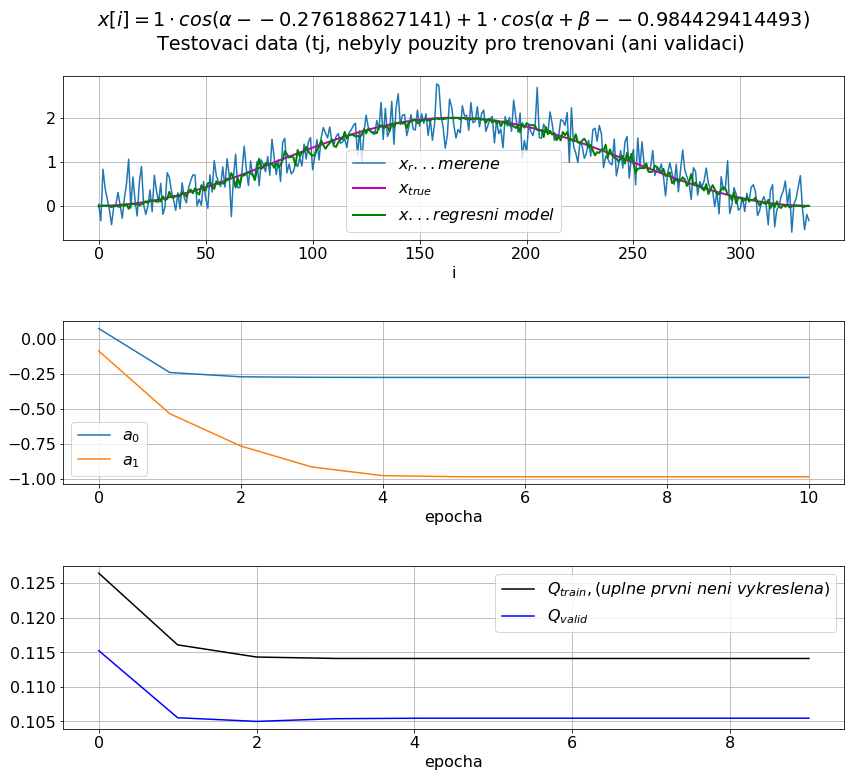

In [34]:
#-setups
mu=.1     #learning rate
epochs=10  # pocet trenovacich epoch
Ntrain=len(xr[::3])    # pocet trenovacich dat, lepsi kdyz je integer
Nvalid=len(xr[1:][::3])
Ntest=len(xr[2:][::3])
#--inicializace promennych
e=zeros(Ntrain)
x=zeros(Ntrain)
J=zeros((Ntrain,2))
a=random.randn(2)/10   # inicializace a=[a_0,a_1]
Qtrain=zeros(epochs+1)
Qvalid=zeros(epochs)
L=eye(2)
a_all=zeros((epochs+1,2))
a_all[0,:]=a
for epoch in range(epochs):
    x=L0*cos(alphar[::3]-a[0])+L1*cos(alphar[::3]+betar[::3]-a[1])
    # updatovani (trenovani)
    J[:,-0]=L0*sin(alphar[::3]-a[0])
    J[:,1]=L1*sin(alphar[::3]+betar[::3]-a[1])
    e=xr[::3]-x
    Qtrain[epoch]=mean(e**2)
    da=dot(dot(linalg.inv(dot(J.T,J)+1/mu*L),J.T),e)
    a=a+da
    a_all[epoch+1,:]=a
    #---validace
    xvalid=L0*cos(alphar[1:][::3]-a[0])+L1*cos(alphar[1:][::3]+betar[1:][::3]-a[1])
    evalid=xr[1:][::3]-xvalid
    Qvalid[epoch]=mean(evalid**2)
#    print "Qtrain=",Qtrain[epoch]," Qvalid=",Qvalid[epoch]
x=L0*cos(alphar[::3]-a[0])+L1*cos(alphar[::3]+betar[::3]-a[1])
e=xr[::3]-x
Qtrain[epoch+1]=mean(e**2)
#Test
xtest=L0*cos(alphar[2:][::3]-a[0])+L1*cos(alphar[2:][::3]+betar[2:][::3]-a[1])
Qtest=mean((xr[2:][::3]-xtest)**2)
print "$Q_{test}=",Qtest

print "Hledany regresni model je"

tit=("x[i]="+str(L0)+ur"\cdot cos ( \alpha -"+str(a[0])+")+"+str(L1)+\
     ur"\cdot cos(\alpha +\beta -"+str(a[1])+")")

figure(figsize=(14,12))
subplot(311)
subplots_adjust(hspace=.5)
title("$"+ tit+"$" +" \n""Testovaci data (tj, nebyly pouzity pro trenovani (ani validaci) \n")
plot(xr[2:][::3],label='$x_r...merene$')
plot(x_true[2:][::3],'m',linewidth=2,label="$x_{true}$")
plot(xtest,'g',linewidth=2,label="$x ... regresni \ model$")
xlabel("i")

legend()

grid()
subplot(312)
plot(a_all[:,0],label="$a_0$")
plot(a_all[:,1],label="$a_1$")
xlabel("epocha")
grid()
legend()
subplot(313)
plot(Qtrain[1:],'k',label="$Q_{train} ,(uplne \ prvni \ neni \ vykreslena)$")
plot(Qvalid,'b',label="$Q_{valid}$")
xlabel("epocha")
grid()
legend()
show()


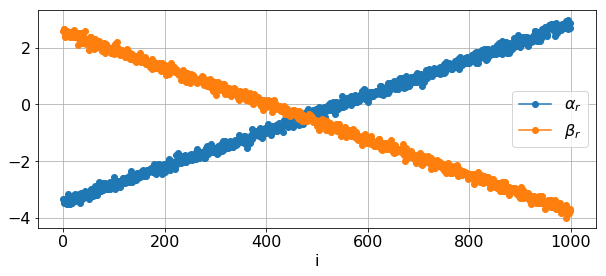

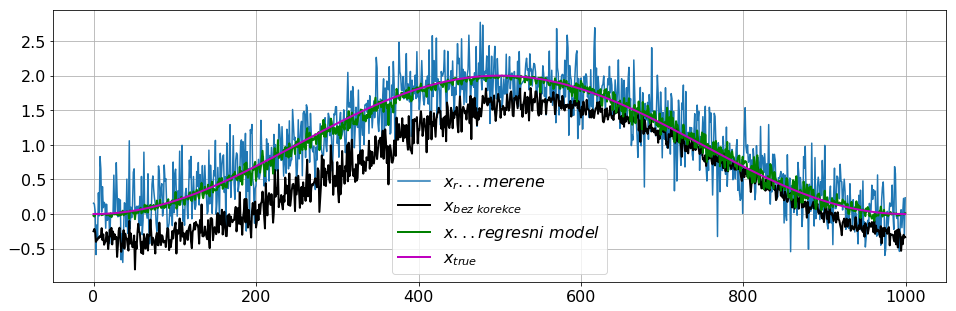

In [40]:
x=L0*cos(alphar-a[0])+L1*cos(alphar+betar-a[1])
x_bezkorekce=L0*cos(alphar)+L1*cos(alphar+betar)

figure(figsize=(10,4))
plot(alphar,'o-',label=ur"$\alpha_r$")
plot(betar,'o-',label=ur"$\beta_r$");xlabel("i")
grid(),legend()
figure(figsize=(16,5))
plot(xr,label='$x_r...merene$')
plot(x_bezkorekce,'k',linewidth=2,label="$x_{bez \ korekce}$")
plot(x,'g',linewidth=2,label="$x ... regresni \ model$")
plot(x_true,'m',linewidth=2,label="$x_{true}$")

legend()

grid()

<div style="width:100%;height:10px;background-color:green;"> </div>
<h3> Řešení při známé poloze  $y$ , tj. odměřené kvůli získání regresního modelu </h3>


<div style="width:100%;height:10px;background-color:green;"> </div>
## Odkazy

[1] 2.10. Sympy : Symbolic Mathematics in Python — Scipy lecture notes [online]. [vid. 2017-10-27]. Dostupné z: http://www.scipy-lectures.org/advanced/sympy.html#using-sympy-as-a-calculator

[2] MILÁČEK, Stanislav. Náhodné a chaotické jevy v mechanice. Praha: ČVUT, Strojní fakulta, 2000. ISBN 978-80-01-02170-5. 



--